In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

from __future__ import print_function

from matplotlib import rcParams
rcParams["savefig.dpi"] = 100
rcParams["figure.dpi"] = 100
rcParams["font.size"] = 20

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

/Users/dforeman/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


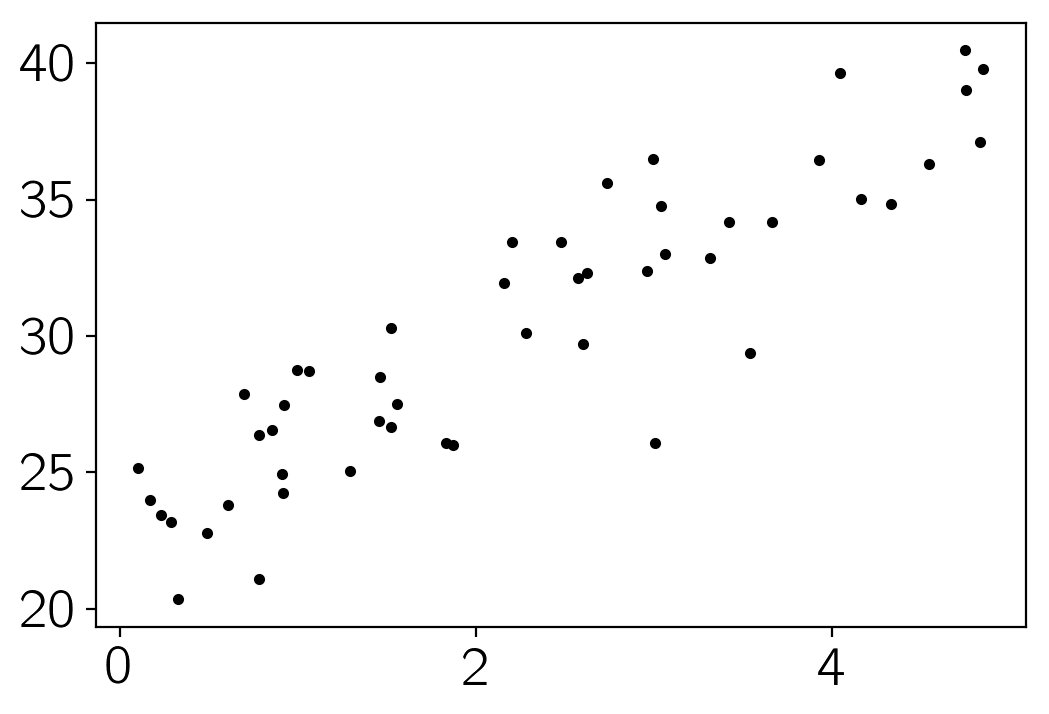

In [3]:
np.random.seed(42)

N = 50
x = np.sort(np.random.uniform(0, 5, N))
true_slope = 3.2
true_intercept = 23.0

y = true_slope * x + true_intercept
y += 2.5 * np.random.randn(N)

plt.plot(x, y, ".k");

In [72]:
x_tensor = tf.placeholder(tf.float64, (N,))
y_tensor = tf.placeholder(tf.float64, (N,))

m = tf.Variable(tf.ones(1, dtype=tf.float64))
b = tf.Variable(30*tf.ones(1, dtype=tf.float64))
log_sigma = tf.Variable(tf.zeros(1, dtype=tf.float64))

model = m * x_tensor + b

nll = 0.5*tf.reduce_sum((y_tensor - model)**2 * tf.exp(-2*log_sigma) + 2.0*log_sigma)

gradient = tf.gradients(nll, [m, b, log_sigma])

opt = tf.train.GradientDescentOptimizer(0.01).minimize(nll, var_list=[m, b, log_sigma])

hess = tf.hessians(nll, [m, b, log_sigma])

init = tf.global_variables_initializer()

In [73]:
with tf.Session() as session:
    session.run(init)
    
    data = {x_tensor: x, y_tensor: y}
    nll_history = []
    for i in range(100):
        session.run(opt, feed_dict=data)
        nll_history.append(session.run(nll, feed_dict=data))
    
    hess_result = session.run(hess, feed_dict=data)
    params = session.run([m, b, log_sigma])
    pred = session.run(model, feed_dict=data)

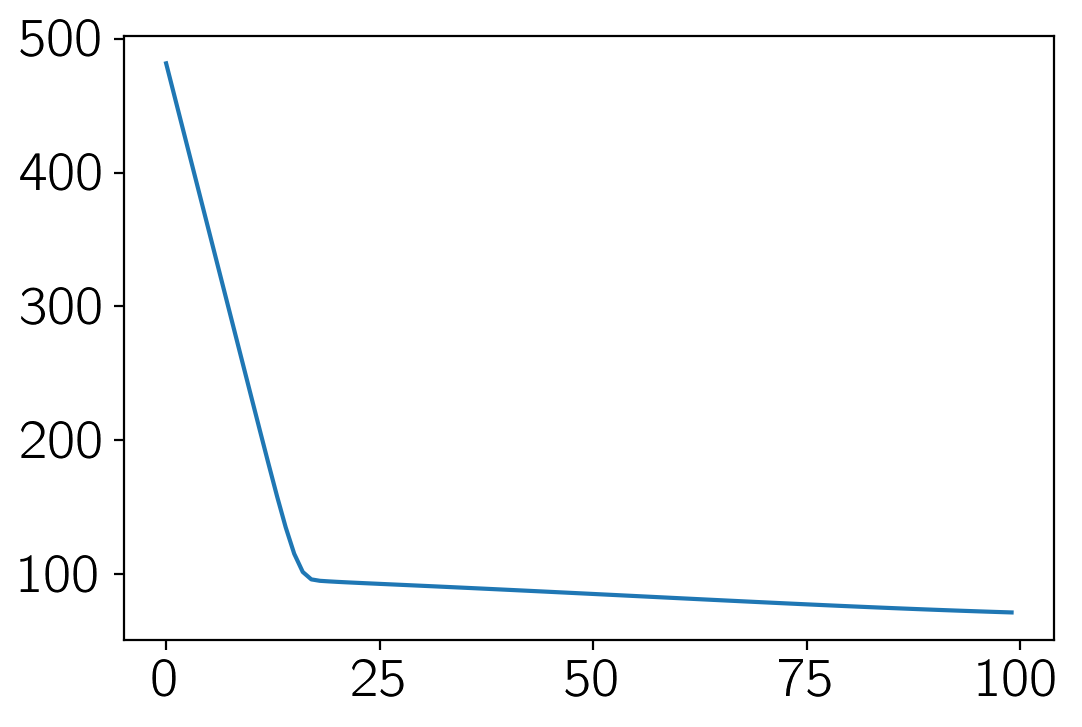

In [74]:
plt.plot(nll_history)

In [76]:
hess_result

[array([[ 54.4289521]]), array([[ 7.75803801]]), array([[ 99.19213902]])]

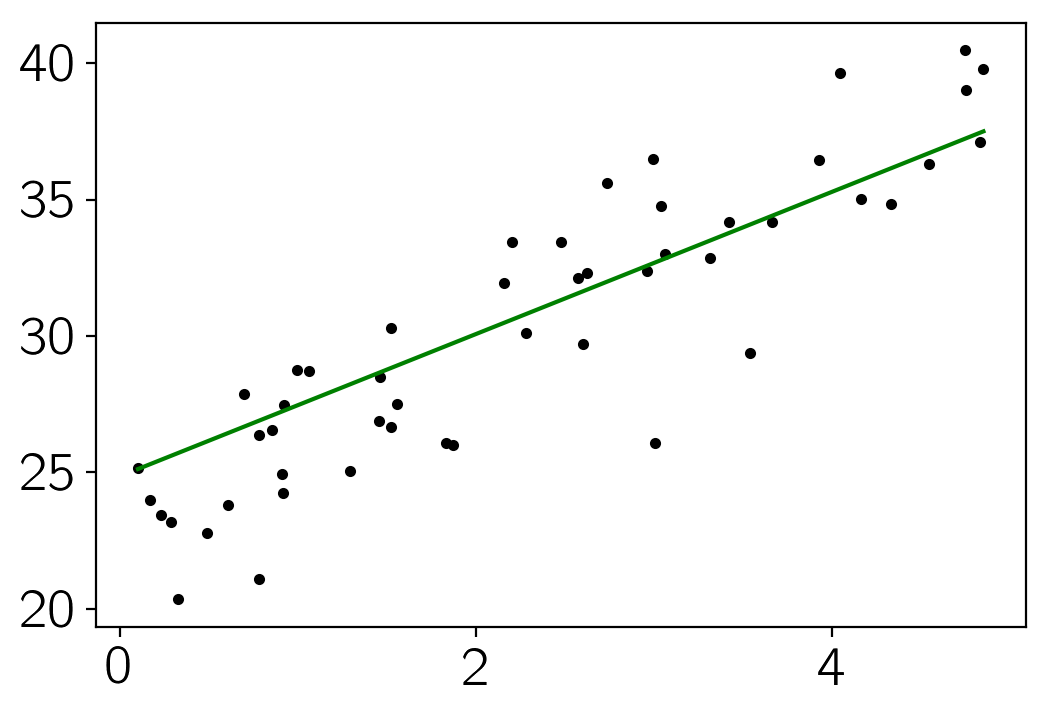

In [77]:
plt.plot(x, y, ".k")
plt.plot(x, pred, "g");